<a href="https://colab.research.google.com/github/ninethsense/AI/blob/main/Headshot_Creator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Using prompt: photorealistic headshot, professional portrait, high resolution, sharp focus, detailed facial features, image:/content/image1.jpg, image:/content/image2.jpg, image:/content/image3.jpg, image:/content/image4.jpg, image:/content/image5.jpg


  0%|          | 0/25 [00:00<?, ?it/s]

New headshot saved as new_headshot.png


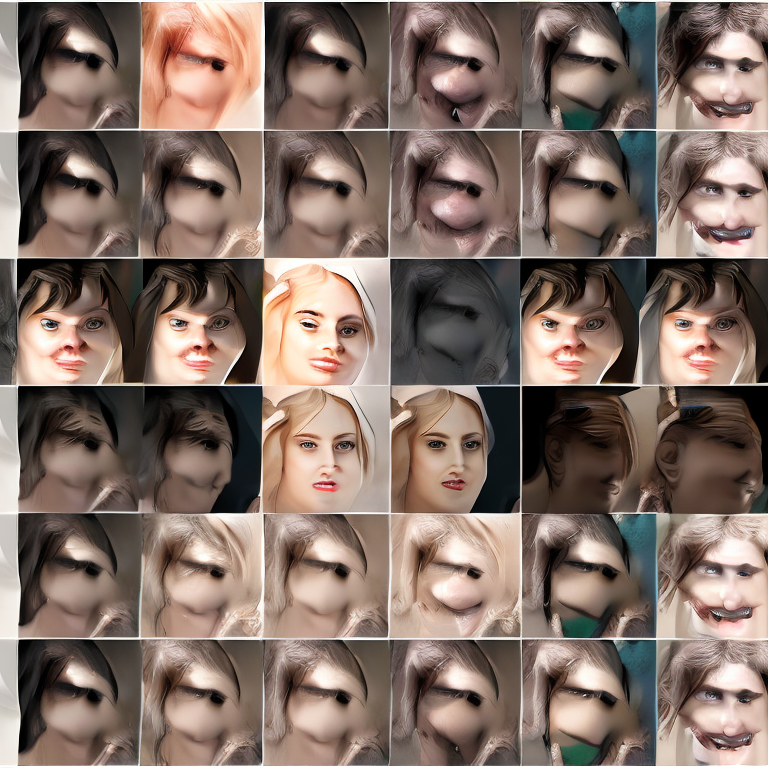

In [1]:
# prompt: python script to generate a new headshot image of a person from 5 images. Use stable diffusion.

# Install necessary libraries
!pip install diffusers transformers accelerate scipy ftfy

# Import libraries
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import os

# Check for GPU availability
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

# Load the Stable Diffusion model
model_id = "stabilityai/stable-diffusion-2-1" # Or any other suitable model
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

# Function to generate a new headshot
def generate_headshot(image_paths, prompt, num_inference_steps=25, guidance_scale=7.5):
    # Concatenate image paths for the prompt
    image_string = ", ".join([f"image:{path}" for path in image_paths])

    full_prompt = f"{prompt}, {image_string}"
    print(f"Using prompt: {full_prompt}")

    image = pipe(full_prompt, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale).images[0]
    return image

# Example usage
# Replace with actual paths to your images
image_paths = ["/content/image1.jpg", "/content/image2.jpg", "/content/image3.jpg", "/content/image4.jpg", "/content/image5.jpg"]

# Ensure the images exist
for path in image_paths:
  if not os.path.exists(path):
    print(f"Error: Image file not found: {path}")
    exit()


prompt = "photorealistic headshot, professional portrait, high resolution, sharp focus, detailed facial features"

new_headshot = generate_headshot(image_paths, prompt)

# Save or display the generated image
new_headshot.save("/content/new_headshot.png")
print("New headshot saved as new_headshot.png")

# Optionally, display the image in Colab
new_headshot  # This will display the image in the Colab output
